# Illya-BOICHUK-Camp-2025

## Task 1
Generate the sequence of 20 random integer values from 0 to 100.
Build the plot that joins each neighbour's values as shown on the image for
`[88, 26, 71, 56, 34, 93, 4, 53, 87, 97, 23, 18, 54, 48, 78, 40, 70, 89, 4, 59]`

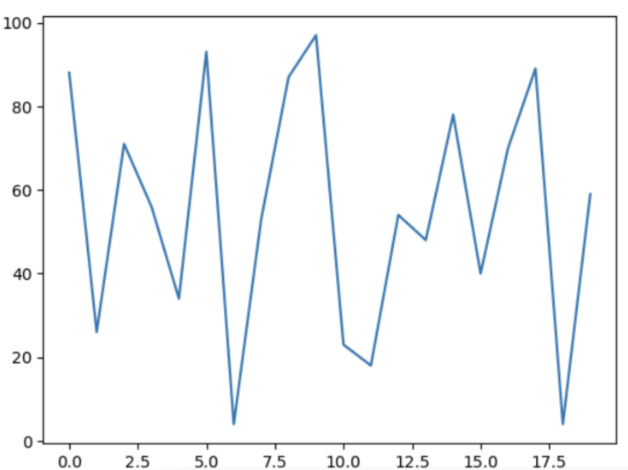

Consider the values as the heights of 2d mountains on which the rain falls
from above. Those subsequences that have larger values on boundaries
form the lakes.

1) Develop the function that accepts the list of provided 20 integer
values and calculates the depth of the deepest lake. Considering the 
above example, the response should be 89 which is the depth of the
lake formed by subsequence `[93, 4, 53, 87, 97]`.

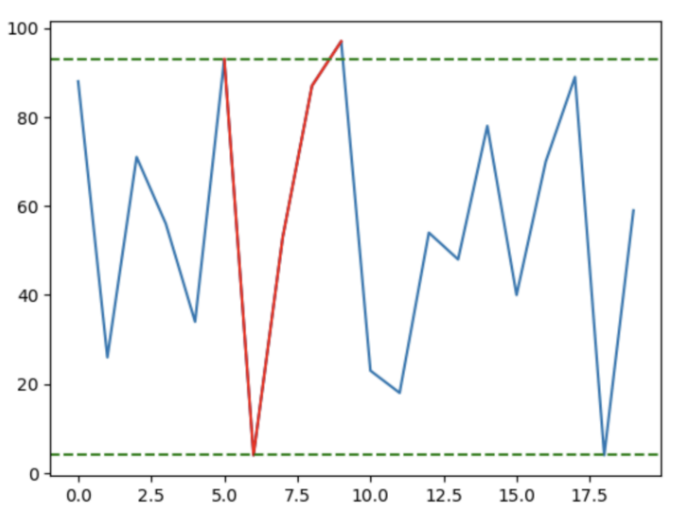

2) Visualize the values as heights and highlight the deepest lake.

**Response format:**
Programming code in jupyter notebook/colab/etc. containing the following:
1) Generating list of 20 random values,
2) Function that calculates the depth of deepest lake
3) Visualization

Згенеровані висоти: [ 46   2  70  97  17  18  36 100  77  66  60 100  66  52  23  38  54  97
  40  68]
Глибина: 80
Позиції (ліва, дно, права): (3, 4, 7)


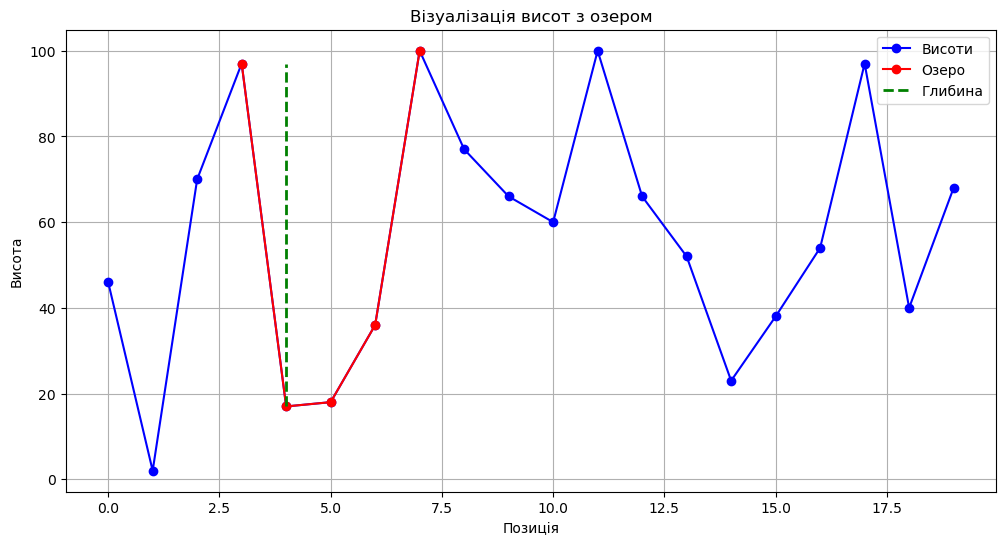

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

h = np.random.randint(0, 101, 20)
print("Згенеровані висоти:", h)

def find_lake(h):
    n = len(h)
    max_d = 0 
    lake = None 
    
    for l in range(n-2):
        for r in range(l + 2, n):
            wall_h = min(h[l], h[r])
            mid_h = h[l+1:r] 
        
            if max(mid_h) < wall_h:
                min_h = min(mid_h)
                min_idx = l + 1 + np.argmin(mid_h) 
                depth = wall_h - min_h 

                if depth > max_d:
                    max_d = depth
                    lake = (l, min_idx, r)
    
    return max_d, lake

depth, lake = find_lake(h)
print(f"Глибина: {depth}")
print(f"Позиції (ліва, дно, права): {lake}")

def plot_h(h, lake):
    plt.figure(figsize=(12, 6))

    plt.plot(h, marker='o', linestyle='-', color='blue', label='Висоти')

    if lake:
        l, b, r = lake 
     
        plt.plot(range(l, r + 1), h[l:r + 1], marker='o', linestyle='-', color='red', label='Озеро')
        
        wall_h = min(h[l], h[r])  
        
        plt.plot([b, b], [h[b], wall_h], 'g--', linewidth=2, label='Глибина')

    plt.xlabel("Позиція")
    plt.ylabel("Висота")
    plt.title("Візуалізація висот з озером")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_h(h, lake)

### Опис роботи
В даному коді було використано такі бібліотеки `import numpy as np` для роботи з масивами та математичними функціями, `import matplotlib.pyplot as plt` для візуалізації даних

### 1. Функція пошуку озера `find_lake`
Функція `find_lake` використовує вкладені цикли для перебору всіх можливих комбінацій лівої та правої "стінки" потенційного озера,перебирає всі можливі позиції для лівої стінки (`l`) від 0 до `n-3`, для кожної лівої стінки перебирає всі можливі позиції для правої стінки (`r`) починаючи з `l+2` до `n-1`. Вимога `l+2` гарантує, що між стінками є хоча б одна точка для "озера"

Для кожної пари стінок (l, r) виконуються такі перевірки:
1. Рівень води в озері визначається висотою нижчої з двох стінок: `wall_h = min(h[l], h[r])`
2. `mid_h = h[l+1:r]` — всі висоти між лівою та правою стінкою
3. `if max(mid_h) < wall_h` — перевіряє, чи всі проміжні точки мають висоту меншу за нижчу стінку
      - Якщо хоча б одна проміжна точка вища або рівна `wall_h`, це не озеро
4. Пошук найнижчої точки озера: 
      - `min_h = min(mid_h)` — висота найнижчої точки
      - `min_idx = l + 1 + np.argmin(mid_h)` — індекс найнижчої точки (зсунутий на `l+1`, оскільки `argmin` повертає індекс відносно підмасиву `mid_h`)

5. `depth = wall_h - min_h` — різниця між рівнем води та найнижчою точкою озера

6. Якщо поточне озеро глибше за попереднє найглибше, зберігаємо його параметри

### 2. Візуалізація результатів `plot_h`
Функція `plot_h` створює графічне представлення рельєфу та знайденого озера:

1. `plt.figure(figsize=(12, 6))` — створює полотно для графіка заданого розміру

2. Синя лінія з маркерами представляє весь рельєф

3. `if lake`, виконується додаткова візуалізація:
      - Ділянка рельєфу, що представляє озеро (від лівої до правої стінки), виділяється червоним кольором
      - Розраховується рівень води: `wall_h = min(h[l], h[r])`
      - Малюється зелена пунктирна вертикальна лінія від дна озера до рівня води, що показує глибину

4. Додаються підписи осей, заголовок, сітка та легенда

Цей алгоритм має часову складність O(n³), де n — кількість точок висоти, оскільки включає вкладені цикли та додаткові операції пошуку мінімуму/максимуму в підмасивах.